In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict


In [2]:
df = pd.read_csv('GSE134896_FSKrepExpTable.csv')

In [3]:
df

,Gene_Name,CTRL_0,CTRL_1,CTRL_2,P4_0,P4_1,P4_2,IL1B_0,IL1B_1,IL1B_2,...,FSK_P4_2,P4_IL1B_0,P4_IL1B_1,P4_IL1B_2,FSK_IL1B_0,FSK_IL1B_1,FSK_IL1B_2,FSK_P4_IL1B_0,FSK_P4_IL1B_1,FSK_P4_IL1B_2
0,A1BG,2.524970,2.922760,5.010730,3.164190,2.713340,5.367390,2.338080,2.385020,3.944630,...,3.244710,3.238950,3.009330,3.439360,3.165130,2.158020,2.986240,2.936740,2.984790,4.386000
1,A1BG-AS1,4.148800,3.509470,7.476490,4.143390,3.410530,6.755130,4.876290,4.486170,4.978530,...,5.093500,4.182290,4.115390,4.479680,4.436270,3.720120,5.208600,3.999340,4.808790,5.464520
2,A1CF,0.033109,0.026954,0.006212,0.008636,0.012403,0.011058,0.025801,0.017084,0.010012,...,0.043199,0.021811,0.035661,0.014843,0.057295,0.010663,0.015037,0.032182,0.021472,0.020424
3,A2MP1,1.297840,1.412140,1.028560,0.488114,0.900081,0.711453,2.801470,3.038050,2.704330,...,2.123450,1.818130,1.107840,2.306910,3.015980,3.928930,3.526550,2.410830,2.392480,2.262270
4,A4GALT,0.590885,0.499050,1.002210,1.147390,1.369420,2.114420,0.949840,0.988493,1.421870,...,1.694960,1.770900,1.921070,2.285950,1.234020,1.060840,1.759970,1.472920,2.356290,3.458990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,ZYG11A,2.524580,2.182580,1.918560,2.406630,2.343240,1.691110,2.240310,2.214580,1.959320,...,2.073560,2.322060,2.405590,2.513720,2.419970,2.524700,2.372250,2.277150,1.866590,1.912540
16496,ZYG11B,10.092800,9.864140,5.803590,10.492900,9.853350,6.324330,8.330180,8.304180,6.731280,...,12.560000,10.531600,9.829980,8.405140,10.794800,11.171000,8.663610,12.288000,11.282600,8.415520
16497,ZYX,149.152000,137.918000,201.715000,134.264000,124.370000,194.723000,167.477000,165.154000,221.814000,...,148.525000,136.191000,122.809000,140.793000,172.163000,136.844000,212.325000,138.255000,152.255000,206.894000
16498,ZZEF1,10.678900,10.797300,10.281100,9.965200,10.543400,10.591000,10.567400,10.665800,10.825100,...,12.733500,10.643400,10.586500,11.348900,11.781300,12.184700,12.132000,11.917400,13.412000,12.522200


In [4]:
df.columns

Index(['Gene_Name', 'CTRL_0', 'CTRL_1', 'CTRL_2', 'P4_0', 'P4_1', 'P4_2',
       'IL1B_0', 'IL1B_1', 'IL1B_2', 'FSK_0', 'FSK_1', 'FSK_2', 'FSK_P4_0',
       'FSK_P4_1', 'FSK_P4_2', 'P4_IL1B_0', 'P4_IL1B_1', 'P4_IL1B_2',
       'FSK_IL1B_0', 'FSK_IL1B_1', 'FSK_IL1B_2', 'FSK_P4_IL1B_0',
       'FSK_P4_IL1B_1', 'FSK_P4_IL1B_2'],
      dtype='object')

In [5]:
df.columns = ['Gene_Name', 'CTRL_0', 'CTRL_1', 'CTRL_2', 'P4_0', 'P4_1', 'P4_2',
       'IL1B_0', 'IL1B_1', 'IL1B_2', 'FSK_0', 'FSK_1', 'FSK_2', 'FSK_P4_0',
       'FSK_P4_1', 'FSK_P4_2', 'P4_IL1B_0', 'P4_IL1B_1', 'P4_IL1B_2',
       'FSK_IL1B_0', 'FSK_IL1B_1', 'FSK_IL1B_2', 'FSK_P4_IL1B_0',
       'FSK_P4_IL1B_1', 'FSK_P4_IL1B_2']

In [6]:
group_dict = {
    'CTRL_0' : 'Control', 
    'CTRL_1' : 'Control', 
    'CTRL_2' : 'Control', 
    'P4_0' : 'P4', 
    'P4_1' : 'P4',  
    'P4_2' : 'P4', 
    'IL1B_0' : 'IL1B', 
    'IL1B_1' : 'IL1B',
    'IL1B_2' : 'IL1B',
    'FSK_0' : 'FSK',
    'FSK_1' : 'FSK',
    'FSK_2' : 'FSK',
    'FSK_P4_0' : 'FSK_P4',
    'FSK_P4_1': 'FSK_P4',
    'FSK_P4_2': 'FSK_P4',
    'P4_IL1B_0': 'P4_IL1B',
    'P4_IL1B_1': 'P4_IL1B',
    'P4_IL1B_2': 'P4_IL1B',
    'FSK_IL1B_0':'FSK_IL1B',
    'FSK_IL1B_1':'FSK_IL1B',
    'FSK_IL1B_2':'FSK_IL1B',
    'FSK_P4_IL1B_0':'FSK_P4_IL1B',
    'FSK_P4_IL1B_1': 'FSK_P4_IL1B',
    'FSK_P4_IL1B_2' : 'FSK_P4_IL1B',
}

In [7]:
df.drop('Gene_Name', axis=1)

,CTRL_0,CTRL_1,CTRL_2,P4_0,P4_1,P4_2,IL1B_0,IL1B_1,IL1B_2,FSK_0,...,FSK_P4_2,P4_IL1B_0,P4_IL1B_1,P4_IL1B_2,FSK_IL1B_0,FSK_IL1B_1,FSK_IL1B_2,FSK_P4_IL1B_0,FSK_P4_IL1B_1,FSK_P4_IL1B_2
0,2.524970,2.922760,5.010730,3.164190,2.713340,5.367390,2.338080,2.385020,3.944630,2.441470,...,3.244710,3.238950,3.009330,3.439360,3.165130,2.158020,2.986240,2.936740,2.984790,4.386000
1,4.148800,3.509470,7.476490,4.143390,3.410530,6.755130,4.876290,4.486170,4.978530,4.983430,...,5.093500,4.182290,4.115390,4.479680,4.436270,3.720120,5.208600,3.999340,4.808790,5.464520
2,0.033109,0.026954,0.006212,0.008636,0.012403,0.011058,0.025801,0.017084,0.010012,0.018494,...,0.043199,0.021811,0.035661,0.014843,0.057295,0.010663,0.015037,0.032182,0.021472,0.020424
3,1.297840,1.412140,1.028560,0.488114,0.900081,0.711453,2.801470,3.038050,2.704330,2.475720,...,2.123450,1.818130,1.107840,2.306910,3.015980,3.928930,3.526550,2.410830,2.392480,2.262270
4,0.590885,0.499050,1.002210,1.147390,1.369420,2.114420,0.949840,0.988493,1.421870,0.988364,...,1.694960,1.770900,1.921070,2.285950,1.234020,1.060840,1.759970,1.472920,2.356290,3.458990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,2.524580,2.182580,1.918560,2.406630,2.343240,1.691110,2.240310,2.214580,1.959320,2.377350,...,2.073560,2.322060,2.405590,2.513720,2.419970,2.524700,2.372250,2.277150,1.866590,1.912540
16496,10.092800,9.864140,5.803590,10.492900,9.853350,6.324330,8.330180,8.304180,6.731280,10.926800,...,12.560000,10.531600,9.829980,8.405140,10.794800,11.171000,8.663610,12.288000,11.282600,8.415520
16497,149.152000,137.918000,201.715000,134.264000,124.370000,194.723000,167.477000,165.154000,221.814000,150.068000,...,148.525000,136.191000,122.809000,140.793000,172.163000,136.844000,212.325000,138.255000,152.255000,206.894000
16498,10.678900,10.797300,10.281100,9.965200,10.543400,10.591000,10.567400,10.665800,10.825100,11.962800,...,12.733500,10.643400,10.586500,11.348900,11.781300,12.184700,12.132000,11.917400,13.412000,12.522200


In [8]:
df_transpose = df.T[1:]


In [20]:
x = df.drop('Gene_Name', axis=1).values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop('Gene_Name', axis=1)[['CTRL_0', 'CTRL_1',  'CTRL_2']])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


principalComponents2 = pca.fit_transform(df.drop('Gene_Name', axis=1)[['P4_0', 'P4_1',  'P4_2']])
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2'])

In [21]:
targets = []
colors = ['red', 'green', 'blue', 'purple', 'pink', 'yellow', 'teal', 'black' ]
for key in group_dict.keys():
    if(group_dict[key] not in targets):
        targets.append((group_dict[key]))
        
label_to_color_dict = {targets[i]: colors[i] for i in range(len(targets))}

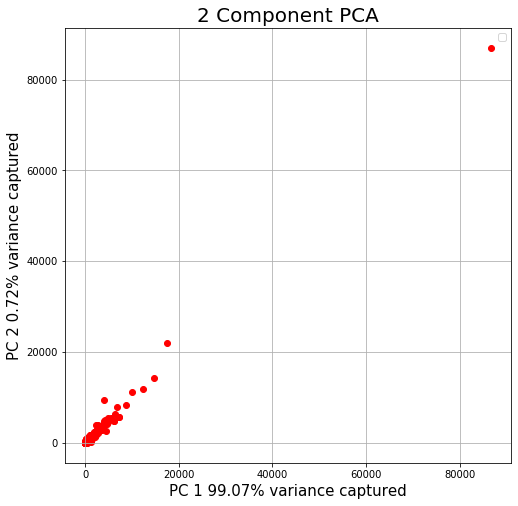

In [23]:
counter = 0
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ratio_explained = pca.explained_variance_ratio_
"{0:.2f}".format(ratio_explained[0])
ax.set_xlabel('PC 1' + " {:.2%}".format(ratio_explained[0]) + ' variance captured', fontsize = 15)
ax.set_ylabel('PC 2' + " {:.2%}".format(ratio_explained[1]) + ' variance captured', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

        
ax.scatter(principalDf['principal component 1'],
               principalDf2[ 'principal component 1'],
               c = 'red',
               #s = 50,
               #label = group_dict[df.columns[i + 1]]
              )

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.grid()

In [16]:
pca.explained_variance_ratio_


array([0.98175655, 0.01285187])

In [ ]:
import matplotlib.pyplot as plt
#plt.xscale('log')
#plt.yscale('log')
plt.scatter(list(principalDf['principal component 1']),list(principalDf['principal component 2']))
plt.show()

In [89]:
counter = 1
for key in group_dict.keys():
    print(key + '=' + key + ',')
    counter =counter + 1

CTRL_0=CTRL_0,
CTRL_1=CTRL_1,
CTRL_2=CTRL_2,
P4_0=P4_0,
P4_1=P4_1,
P4_2=P4_2,
IL1B_0=IL1B_0,
IL1B_1=IL1B_1,
IL1B_2=IL1B_2,
FSK_0=FSK_0,
FSK_1=FSK_1,
FSK_2=FSK_2,
FSK_P4_0=FSK_P4_0,
FSK_P4_1=FSK_P4_1,
FSK_P4_2=FSK_P4_2,
P4_IL1B_0=P4_IL1B_0,
P4_IL1B_1=P4_IL1B_1,
P4_IL1B_2=P4_IL1B_2,
FSK_IL1B_0=FSK_IL1B_0,
FSK_IL1B_1=FSK_IL1B_1,
FSK_IL1B_2=FSK_IL1B_2,
FSK_P4_IL1B_0=FSK_P4_IL1B_0,
FSK_P4_IL1B_1=FSK_P4_IL1B_1,
FSK_P4_IL1B_2=FSK_P4_IL1B_2,


In [62]:
principalDf

,principal component 1,principal component 2
0,-171.364448,-6.705719
1,-164.120879,-6.128998
2,-186.817614,-5.413320
3,-176.592920,-2.718845
4,-179.567223,-5.086388
...,...,...
16495,-175.854589,-4.253148
16496,-140.320804,2.662933
16497,597.779213,-5.000616
16498,-130.624354,0.438745
